In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts"

csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Test"

In [4]:
rc_exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)
rc_exp.rtc_processing()
rc_exp.read_and_merge_manual_scoring(csv_path)
rc_exp.remove_tangles()   # Remove sound cues and winner array indexes where there are tangles
rc_exp.remove_specified_subjects()   # Remove specified subjects from the analysis
rc_exp.extract_da_columns()   # Grab only essential columns for analysis
rc_exp.find_first_port_entry_after_sound_cue()
rc_exp.compute_EI_DA()
rc_exp.compute_rtc_da_metrics().head()
rc_exp.split_by_winner()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240912-080246\Notes.txt
read from t=0s to t=2051.77s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240913-094304\Notes.txt
read from t=0s to t=2044.77s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240915-060250\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240915-095000\Notes.txt
read from t=0s to t=2070.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

KeyboardInterrupt: 

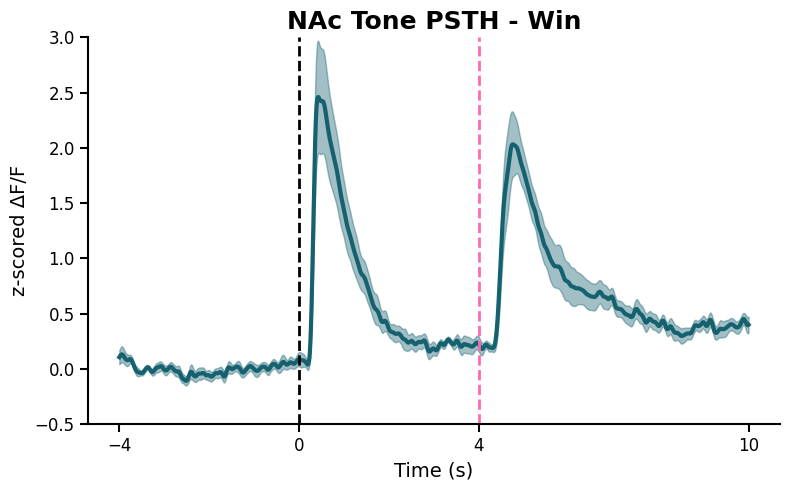

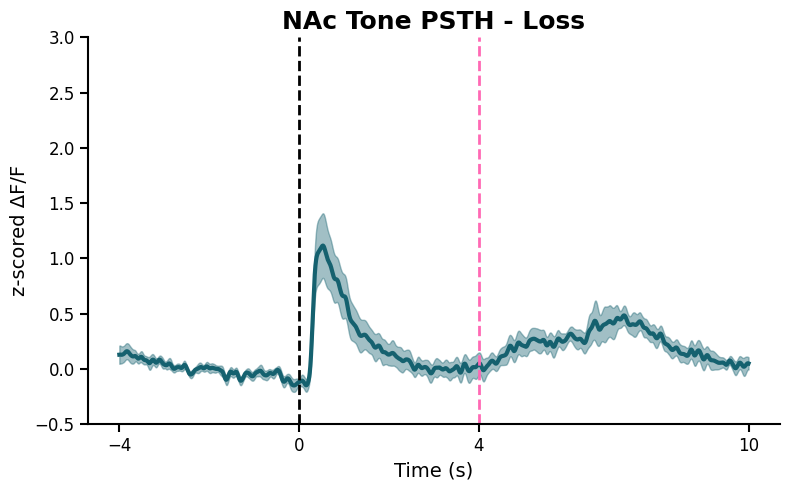

In [ ]:
# 1) build your winner/loser df as before:
winner_df = rc_exp.winner_df

# 2) compute each subject’s mean trace for “Tone” events:
subj_means = rc_exp.compute_subject_mean_traces(winner_df, event_type="Tone")

# 3) plot the group average for NAc:
rc_exp.plot_group_mean_traces(
    subj_means,
    event_type="Tone",
    brain_region="NAc",
    color="#15616F",
    title="NAc Tone PSTH - Win",
    ylim=(-0.5,3),
    save_path=None
)


subj_losers = rc_exp.compute_subject_mean_traces(rc_exp.loser_df, event_type="Tone")

# 3) plot the group average for NAc:
rc_exp.plot_group_mean_traces(
    subj_losers,
    event_type="Tone",
    brain_region="NAc",
    color="#15616F",
    title="NAc Tone PSTH - Loss",
    ylim=(-0.5,3),
    save_path=None
)

mPFC

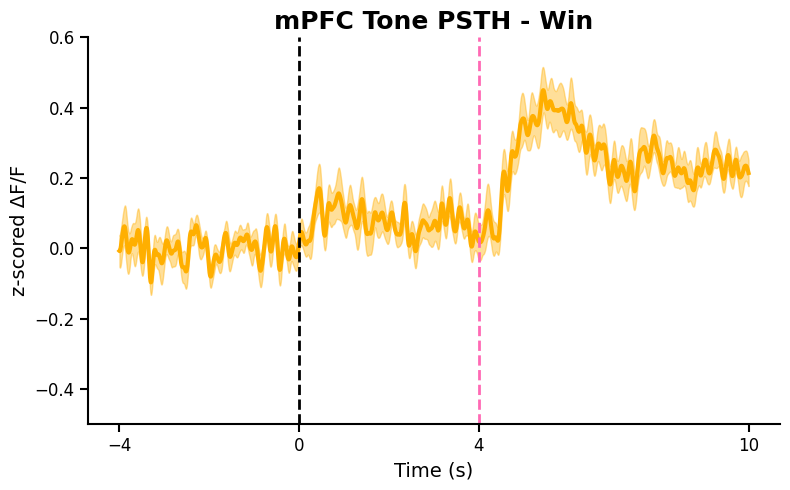

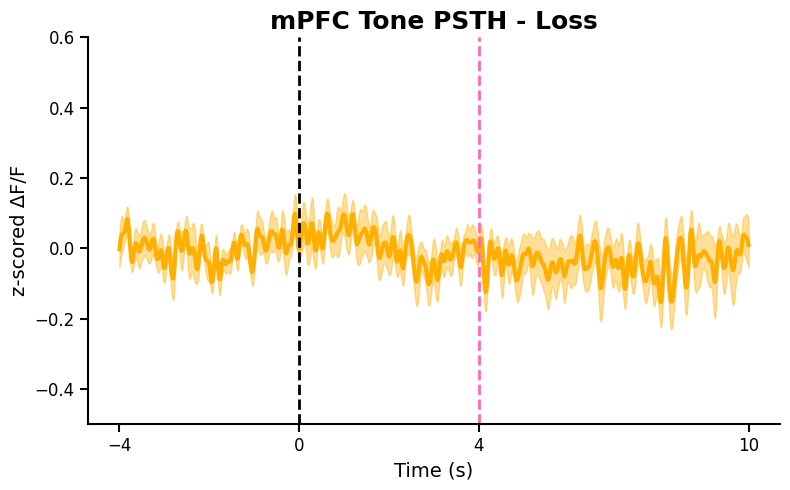

In [ ]:
# 1) build your winner/loser df as before:
winner_df = rc_exp.winner_df

subj_means = rc_exp.compute_subject_mean_traces(winner_df, event_type="Tone")
rc_exp.plot_group_mean_traces(
    subj_means,
    event_type="Tone",
    brain_region="mPFC",
    color="#FFAF00",
    title="mPFC Tone PSTH - Win",
    ylim=(-0.5,0.6),
    save_path=None
)

subj_losers = rc_exp.compute_subject_mean_traces(rc_exp.loser_df, event_type="Tone")
# 3) plot the group average for NAc:
rc_exp.plot_group_mean_traces(
    subj_losers,
    event_type="Tone",
    brain_region="mPFC",
    color="#FFAF00",
    title="mPFC Tone PSTH - Loss",
    ylim=(-0.5,0.6),
    save_path=None
)

Old method

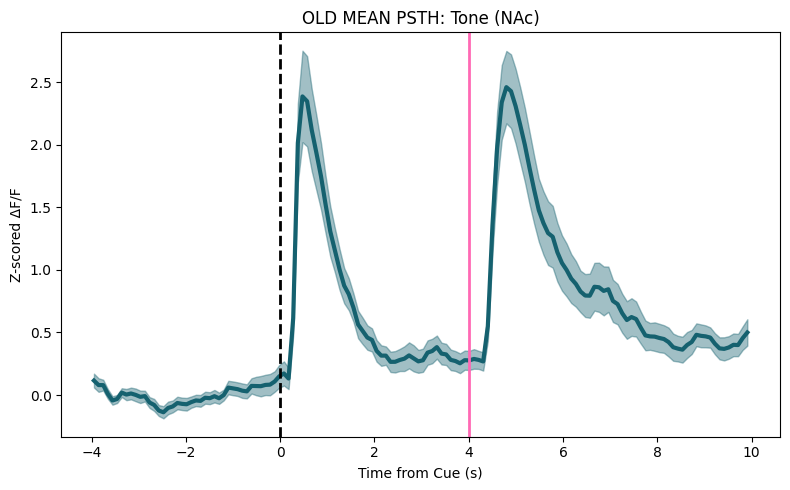

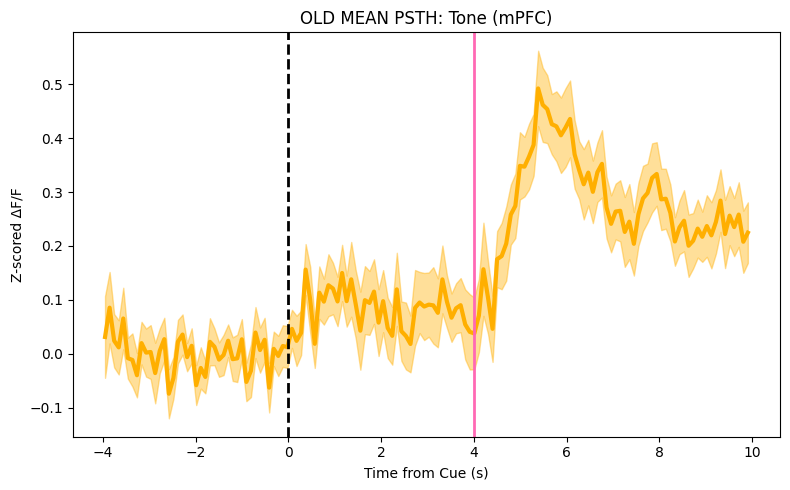

In [ ]:
rc_exp.old_plot_mean_psth(
    winner_df=rc_exp.winner_df,
    event_type="Tone",
    brain_region="NAc",
    directory_path=None
)


rc_exp.old_plot_mean_psth(
    winner_df=rc_exp.winner_df,
    event_type="Tone",
    brain_region="mPFC",
    directory_path=None
)


Win vs. Loss


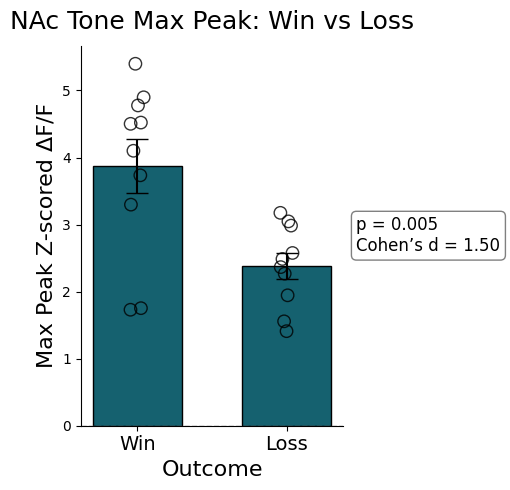

{'t_stat': 3.348387612152672, 'p_value': 0.0052836401095143004, 'cohen_d': 1.497444463158315}


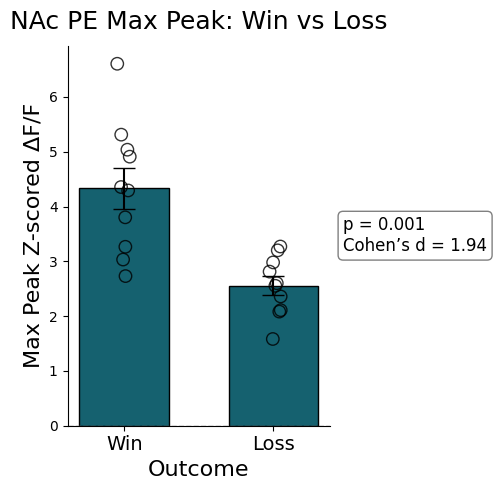

{'t_stat': 4.327680410281119, 'p_value': 0.0008903449291109254, 'cohen_d': 1.9353975164565524}


In [ ]:
# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='Max Peak',
    behavior='Tone',
    brain_region='NAc',
    directory_path=None,
    color_win='#15616F',
    color_loss='#15616F'
)
print(stats)


# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='Max Peak',
    behavior='PE',
    brain_region='NAc',
    directory_path=None,
    color_win='#15616F',
    color_loss='#15616F'
)
print(stats)


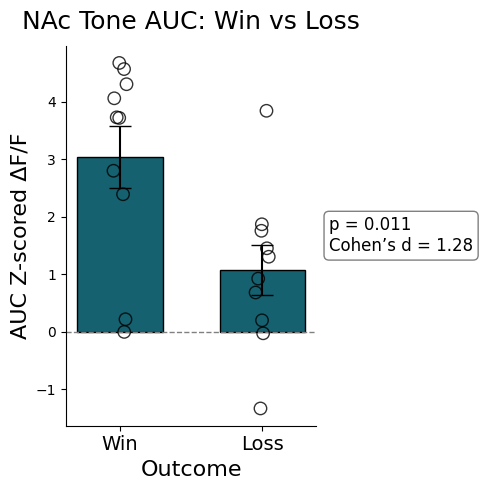

{'t_stat': 2.856992375239272, 'p_value': 0.010823858496400716, 'cohen_d': 1.27768583244672}


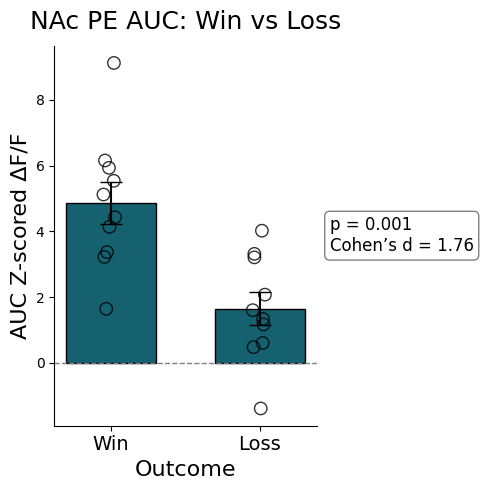

{'t_stat': 3.9328464015945643, 'p_value': 0.0010696677167124637, 'cohen_d': 1.7588223798061766}


In [ ]:
# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='AUC',
    behavior='Tone',
    brain_region='NAc',
    directory_path=None,
    color_win='#15616F',
    color_loss='#15616F'
)
print(stats)


# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='AUC',
    behavior='PE',
    brain_region='NAc',
    directory_path=None,
    color_win='#15616F',
    color_loss='#15616F'
)
print(stats)


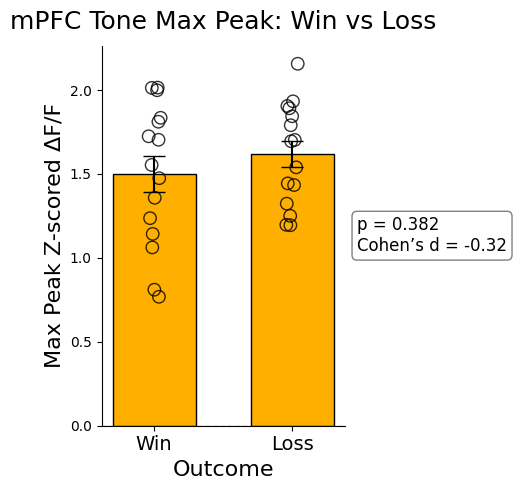

{'t_stat': -0.8897037847752757, 'p_value': 0.3819736476011639, 'cohen_d': -0.3248738882794266}


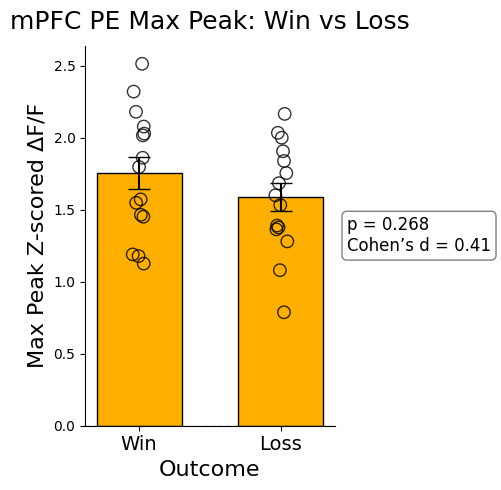

{'t_stat': 1.1303113100540882, 'p_value': 0.26809322745842273, 'cohen_d': 0.41273133434656}


In [ ]:
# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='Max Peak',
    behavior='Tone',
    brain_region='mPFC',
    directory_path=None,
    color_win="#FFAF00",
    color_loss="#FFAF00"
)
print(stats)


# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='Max Peak',
    behavior='PE',
    brain_region='mPFC',
    directory_path=None,
    color_win="#FFAF00",
    color_loss="#FFAF00"
)
print(stats)


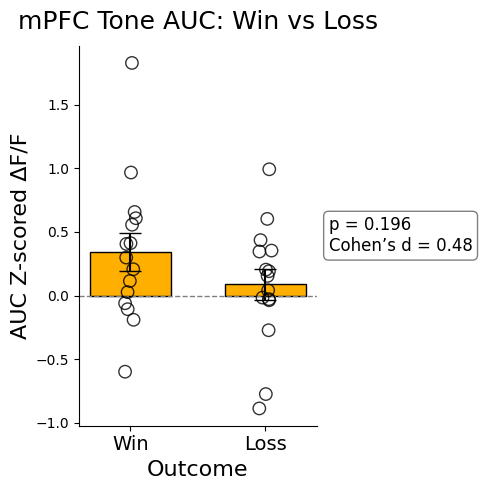

{'t_stat': 1.3241541781796857, 'p_value': 0.19645350011836252, 'cohen_d': 0.483512742002486}


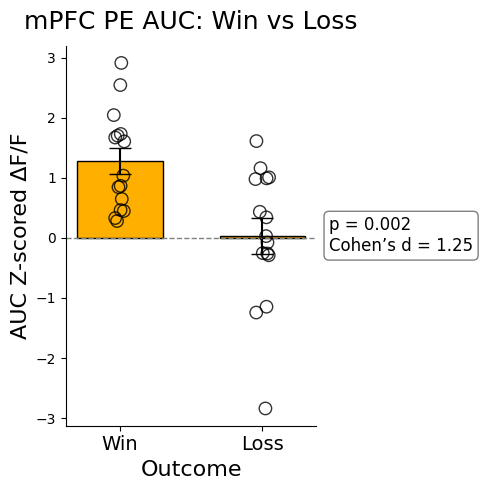

{'t_stat': 3.415872331640135, 'p_value': 0.0021392262908536542, 'cohen_d': 1.24730021973138}


In [ ]:
# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='AUC',
    behavior='Tone',
    brain_region='mPFC',
    directory_path=None,
    color_win="#FFAF00",
    color_loss="#FFAF00"
)
print(stats)


# after you’ve done all the preprocessing & called split_by_winner():
stats = rc_exp.plot_win_vs_loss(
    metric_name='AUC',
    behavior='PE',
    brain_region='mPFC',
    directory_path=None,
    color_win="#FFAF00",
    color_loss="#FFAF00"
)
print(stats)


Looking at indivdiual traces

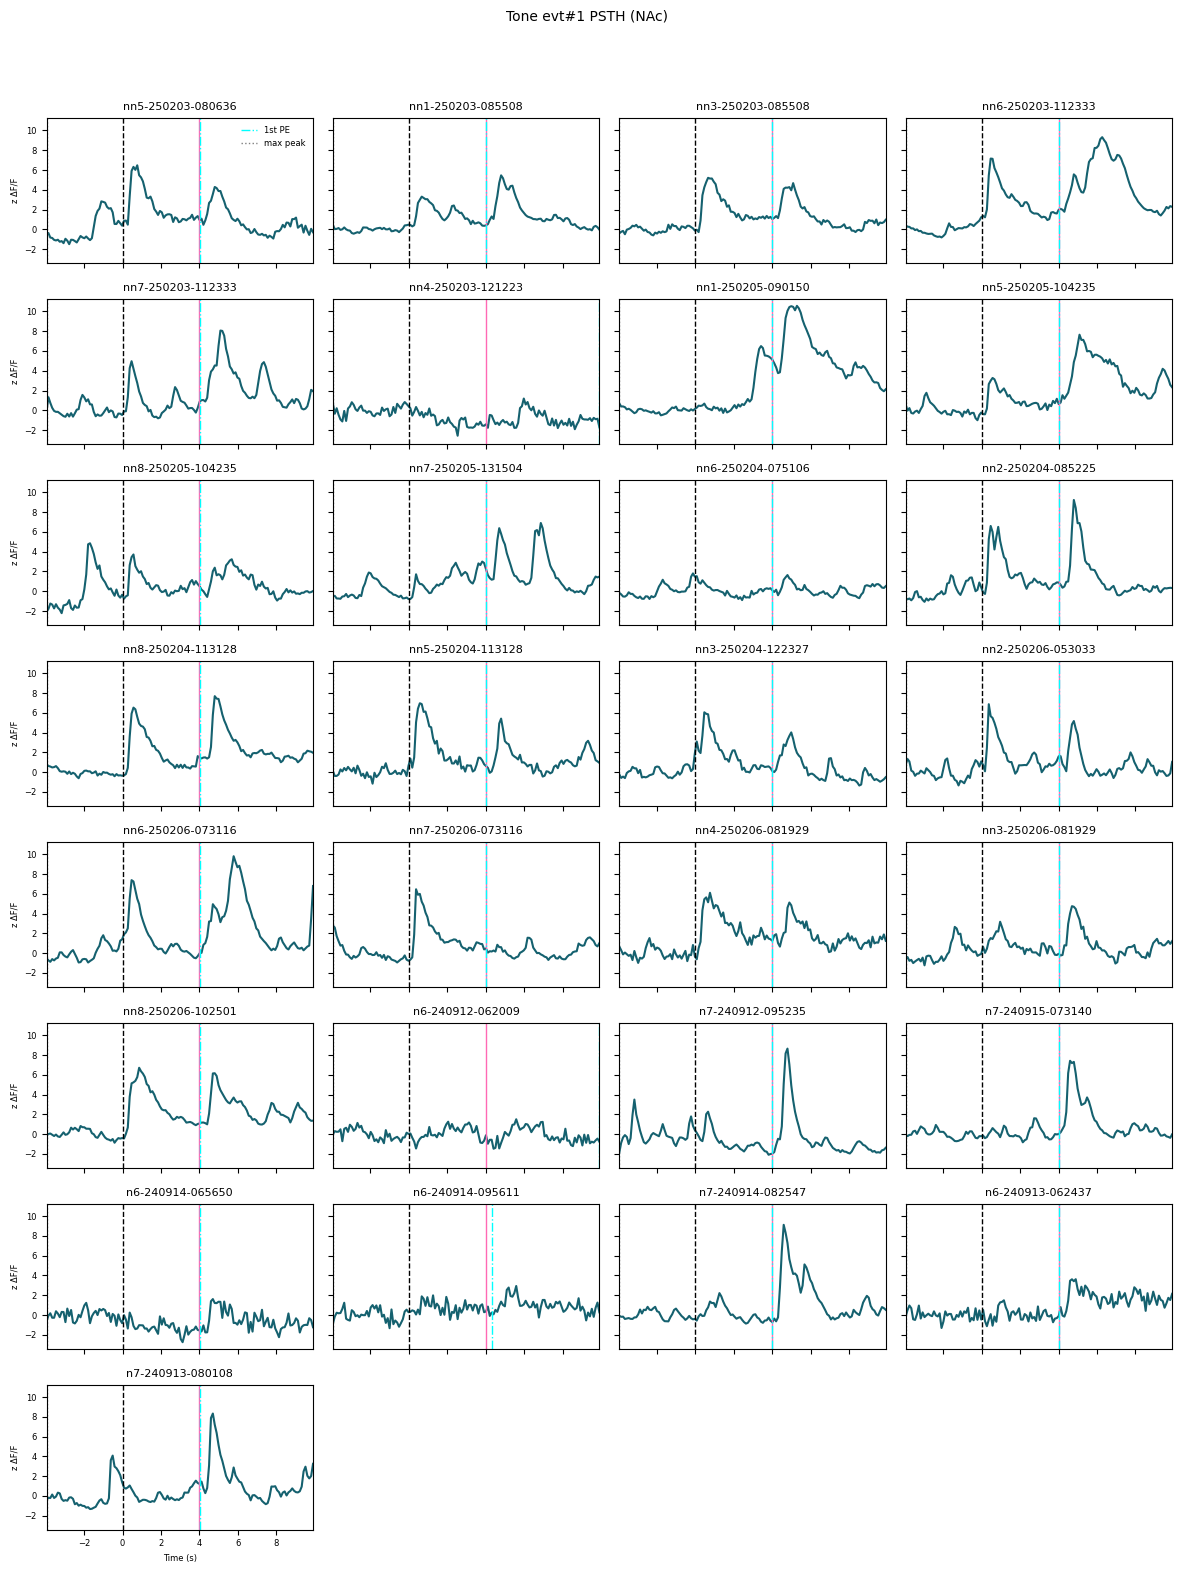

,file_name,event_type,event_index,brain_region,first_PE_s,peak_time_s
0,nn5-250203-080636,Tone,1,NAc,4.000000,-1120.392325
1,nn1-250203-085508,Tone,1,NAc,4.000000,-329.335286
2,nn3-250203-085508,Tone,1,NAc,4.000000,-249.304361
3,nn6-250203-112333,Tone,1,NAc,4.000000,-320.267397
4,nn7-250203-112333,Tone,1,NAc,4.000000,-1595.357440
5,nn4-250203-121223,Tone,1,NAc,25.120113,-243.666954
6,nn1-250205-090150,Tone,1,NAc,4.000000,-1592.715029
7,nn5-250205-104235,Tone,1,NAc,4.000000,-366.808771
8,nn8-250205-104235,Tone,1,NAc,4.000000,-286.786857
9,nn7-250205-131504,Tone,1,NAc,4.000000,-237.219359


: 

In [ ]:
rc_exp.plot_PETH_index_grid(df=rc_exp.winner_df,brain_region='NAc',event_type='Tone',event_index=1)

Old

In [ ]:
ranks = exp.find_ranks_using_ds(csv_path) #david's score
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)

NameError: name 'exp' is not defined

In [ ]:
df_winning.head()

,file name,subject,trial,sound cues,port entries,sound cues onset,port entries onset,port entries offset,subject_name,winner_array,filtered_winner_array,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,DS,Cage,Rank
0,nn5-250203-080636,nn5,<trial_class.Trial object at 0x0000025CD5426EA0>,"{'name': 'PC0/', 'onset': [0.0, 241.12775168, ...","{'name': 'PC2/', 'onset': [0.0, 184.1774592, 1...","[241.12775168, 321.12836608, 411.12895488, 491...","[184.1774592, 185.80733952, 193.31743744, 285....","[184.47745024, 187.45769984, 193.45752064, 285...",nn5,"[tie, nn8, nn8, nn8, nn8, nn8, nn8, nn8, nn8, ...","[tie, nn8, nn8, nn8, nn8, nn8, nn8, nn8, nn8, ...","[1121.13352704, 1421.13570816, 1691.13731072, ...","[184.1774592, 185.80733952, 193.31743744, 285....","[184.47745024, 187.45769984, 193.45752064, 285...",-1.984127,nn2,4
1,pp5-250203-080636,pp5,<trial_class.Trial object at 0x0000025CD4E40110>,"{'name': 'PC0/', 'onset': [0.0, 241.12775168, ...","{'name': 'PC3/', 'onset': [0.0, 181.1275776, 1...","[241.12775168, 321.12836608, 411.12895488, 491...","[181.1275776, 184.02738176, 185.90744576, 187....","[181.68741888, 185.52766464, 186.98747904, 187...",pp5,"[pp5, pp5, pp5, pp5, pp8, pp5, pp8, tie, tie, ...","[pp5, pp5, pp5, pp5, pp8, pp5, pp8, tie, tie, ...","[241.12775168, 321.12836608, 411.12895488, 491...","[181.1275776, 184.02738176, 185.90744576, 187....","[181.68741888, 185.52766464, 186.98747904, 187...",0.990336,pp2,2
2,nn1-250203-085508,nn1,<trial_class.Trial object at 0x0000025CB1B078C0>,"{'name': 'PC0/', 'onset': [0.0, 250.00820736, ...","{'name': 'PC2/', 'onset': [0.0, 194.11779584, ...","[250.00820736, 330.00865792, 420.00941056, 500...","[194.11779584, 203.48796928, 215.75778304, 217...","[196.25771008, 206.667776, 217.06801152, 217.8...",nn1,"[nn2, nn1, nn1, nn1, nn1, nn1, nn2, nn2, nn1, ...","[nn2, nn1, nn1, nn1, nn1, nn1, nn2, nn2, nn1, ...","[330.00865792, 420.00941056, 500.00986112, 503...","[194.11779584, 203.48796928, 215.75778304, 217...","[196.25771008, 206.667776, 217.06801152, 217.8...",-1.967742,nn1,4
3,nn3-250203-085508,nn3,<trial_class.Trial object at 0x0000025CD034FE90>,"{'name': 'PC0/', 'onset': [0.0, 250.00820736, ...","{'name': 'PC3/', 'onset': [0.0, 219.1179776, 2...","[250.00820736, 330.00865792, 420.00941056, 500...","[219.1179776, 230.92805632, 231.34830592, 244....","[225.37814016, 231.26818816, 232.78813184, 246...",nn3,"[nn3, nn4, nn3, nn4, nn4, nn4, nn4, nn4, nn4, ...","[nn3, nn4, nn3, nn4, nn4, nn4, nn4, nn4, nn4, ...","[250.00820736, 420.00941056, 860.01221632, 122...","[219.1179776, 230.92805632, 231.34830592, 244....","[225.37814016, 231.26818816, 232.78813184, 246...",-1.503268,nn1,3
4,nn6-250203-112333,nn6,<trial_class.Trial object at 0x0000025CD54274D0>,"{'name': 'PC0/', 'onset': [0.0, 240.79777792, ...","{'name': 'PC2/', 'onset': [0.0, 180.79727616, ...","[240.79777792, 320.79822848, 410.79881728, 490...","[180.79727616, 184.92735488, 189.60744448, 189...","[184.34736128, 187.74720512, 189.75768576, 190...",nn6,"[nn5, nn6, tie, nn6, nn6, nn6, nn6, nn6, nn6, ...","[nn5, nn6, tie, nn6, nn6, nn6, nn6, nn6, nn6, ...","[320.79822848, 490.79926784, 565.79981312, 665...","[180.79727616, 184.92735488, 189.60744448, 189...","[184.34736128, 187.74720512, 189.75768576, 190...",-0.644444,nn2,2


## PSTH Graphs

In [ ]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='mPFC', use_ei=True
)

In [ ]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='mPFC', use_ei=False
)

In [ ]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='NAc', use_ei=True
)

In [ ]:
peak_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='NAc', use_ei=False
)

In [ ]:
peak_nac_df.head()
# Save without the index column:

In [ ]:
peak_losing_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(df_losing, event_index=1, brain_region='NAc')

In [ ]:
# peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

In [ ]:
peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

# Looking at Peak Variance

In [ ]:
# Plots PSTHs for all bouts within a session based on winning or losing
"""exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)
exp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)"""

In [ ]:
# Plots the PETH of the first and last bouts of either win or loss.
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"""

## Mean PSTH graphs

In [ ]:
# Plots the mean psth for winning or losing bouts for tones
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

## PSTH of Losing Trials

In [ ]:
# Plots the PSTH of either the first or last bout of loss

# Plots the PSTH of the first losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True, plot_win=False)"""

# Plots the PSTH of the last losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"""

## PSTH of winning trials

In [ ]:
# Plots the PSTH of either the first or last bout of win

# Plots the PSTH of the first winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

## Heat Maps Tones

In [ ]:
# Plots tone response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"""

## Heat Maps Licks

In [ ]:
# Plots lick response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"""

## First Tone PSTHs

In [ ]:
# Winning First tone response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_winning, bin_size=100)

# Losing First Tone Response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_losing, bin_size=100)

## Finding Means

In [ ]:
print(df_winning.columns)
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
df_win1 = exp.find_overall_mean(df_winning)
df_lose1 = exp.find_overall_mean(df_losing)

In [ ]:
print(df_win1)

## Heat maps of winning and losing for all subjects

In [ ]:
# Each row represents a separate subject

exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'NAc')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'NAc')

In [ ]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

In [ ]:
# Plots win and lose da_metrics in bar plots side by side. Method can be changed for global
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='AUC', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Max Peak', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Mean Z-score', directory_path=directory_path2)

## Plots first and last win/lass bouts for Global DA

In [ ]:
# Plots bar plots of the first and last wins or loses side by side.
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [ ]:
# Same as previous but using Max Peak as metric
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

In [ ]:
# Same as previous but using Mean Z-score as metric
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

## Plot first and last win/loss bouts for Event Induced DA

In [ ]:
# Same as previous but using EI da metrics.
"""exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

## Scatter plots for Event Induced

In [ ]:
# Plots a scatter plot based on DA metric to tone and rank within cage. metric_name can be changed for other metrics
exp.scatter_dominance(directory_path1, df_win1, metric_name='Tone AUC', method='EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose1, metric_name='Tone AUC', method='EI', condition="Losing")

## First Tone DA

In [ ]:
# Plots the DA metrics from the first tone as bar plots side by side
"""exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='AUC Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Max Peak Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='AUC Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path9)"""

In [ ]:
# Plots scatter plots for dominance using only the DA-response from the first tone.
"""exp.scatter_dominance(directory_path1, df_first_win1, metric_name='AUC', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='AUC', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, metric_name='Max Peak', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='Max Peak', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, 'Mean Z-score', method=' EI', condition='Winning')
exp.scatter_dominance(directory_path1, df_first_lose1, 'Mean Z-score', method=' EI', condition='Losing')"""